In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-whitegrid')  # classic_test_patch  ggplot  seaborn-whitegrid

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [3]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

In [4]:
df = pd.read_csv('datasets/btc-market-price.csv')

In [5]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [6]:
df = pd.read_csv('datasets/btc-market-price.csv', header=None)

In [7]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [8]:
df.columns = ['Timestamp', 'Price']

In [9]:
df.shape

(365, 2)

In [10]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [11]:
df.tail(3)

,Timestamp,Price
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

In [12]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [13]:
pd.to_datetime(df['Timestamp']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [15]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [16]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

The timestamp looks a lot like the index of this `DataFrame`: `date > price`. We can change the autoincremental ID generated by pandas and use the `Timestamp DS` column as the Index:

In [17]:
df.set_index('Timestamp', inplace=True)

In [18]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [19]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

## Putting everything together

And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [20]:
df = pd.read_csv('datasets/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [21]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


**There should be a better way**. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [22]:
df = pd.read_csv(
    'datasets/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [23]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [24]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64



## Plotting basics

`pandas` integrates with Matplotlib and creating a plot is as simple as:

<AxesSubplot:xlabel='Timestamp'>

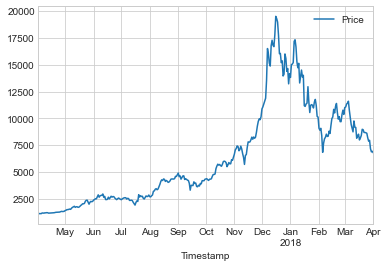

In [25]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

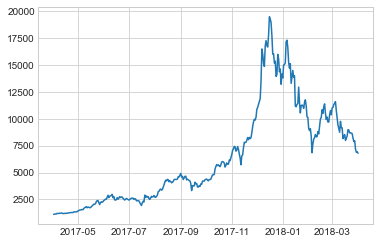

In [26]:
plt.plot(df.index, df['Price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [27]:
x = np.arange(-10, 11)

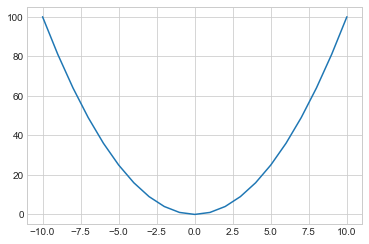

In [28]:
plt.plot(x, x ** 2)

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the _OOP_ API which will make our work much easier.

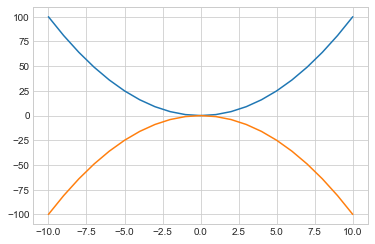

In [29]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

Text(0.5, 1.0, 'My Nice Plot')

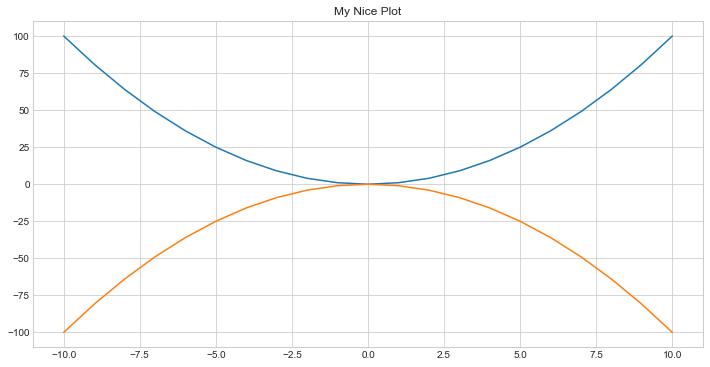

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:

<AxesSubplot:title={'center':'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

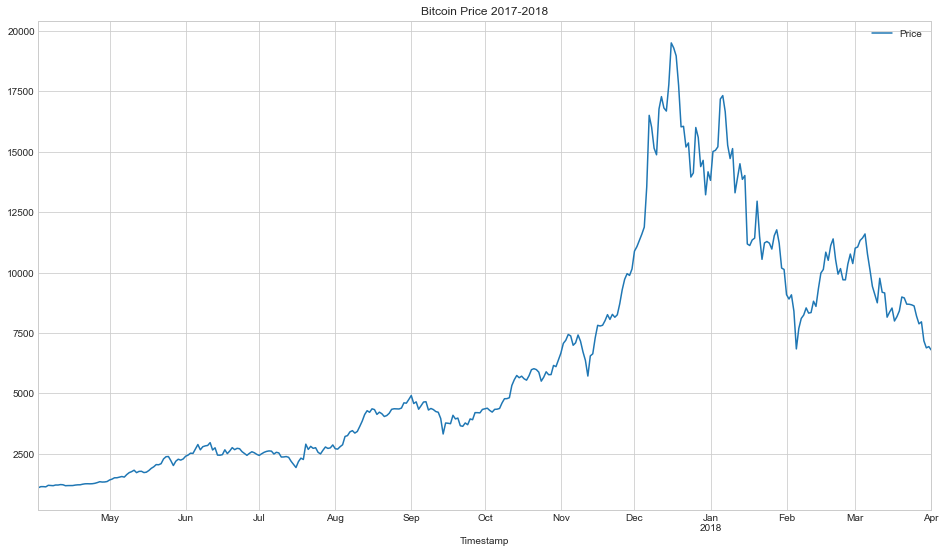

In [31]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')



## A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `datasets/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.

In [32]:
eth = pd.read_csv('datasets/eth-price.csv')

eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [33]:
eth = pd.read_csv('datasets/eth-price.csv', parse_dates=True)

print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:

In [34]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":

In [35]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:

In [36]:
pd.to_datetime(eth['Date(UTC)']).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:

In [37]:
pd.read_csv('datasets/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together again:

In [38]:
eth = pd.read_csv('datasets/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())

eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty `DataFrame` and with the index from Bitcoin prices:

In [39]:
prices = pd.DataFrame(index=df.index)

In [40]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


And we can now just set columns from the other `DataFrame`s:

In [41]:
prices['Bitcoin'] = df['Price']

In [42]:
prices['Ether'] = eth['Value']

In [43]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


We can now try plotting both values:

<AxesSubplot:xlabel='Timestamp'>

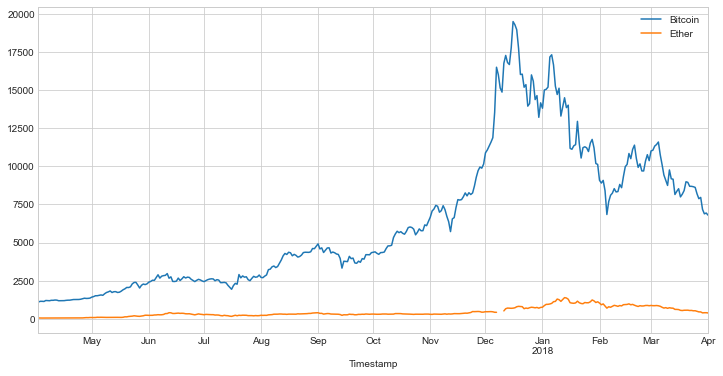

In [44]:
prices.plot(figsize=(12, 6))

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

<AxesSubplot:xlabel='Timestamp'>

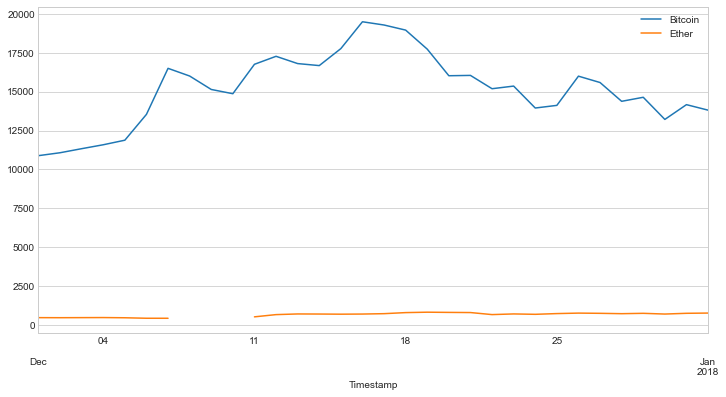

In [45]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

# Reading data from a csv file

In [46]:
# Render our plots inline
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [47]:
broken_df = pd.read_csv('datasets/bikes.csv',encoding = "ISO-8859-1")

In [48]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [49]:
fixed_df = pd.read_csv('datasets/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [50]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
              ... 
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310, dtype: int64

# Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

<AxesSubplot:xlabel='Date'>

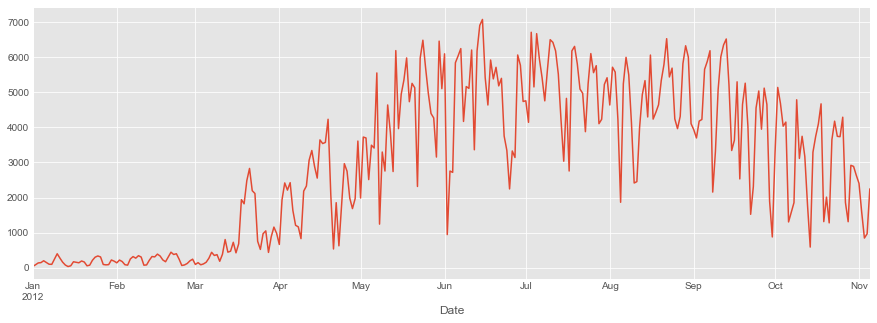

In [51]:
fixed_df['Berri 1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

<AxesSubplot:xlabel='Date'>

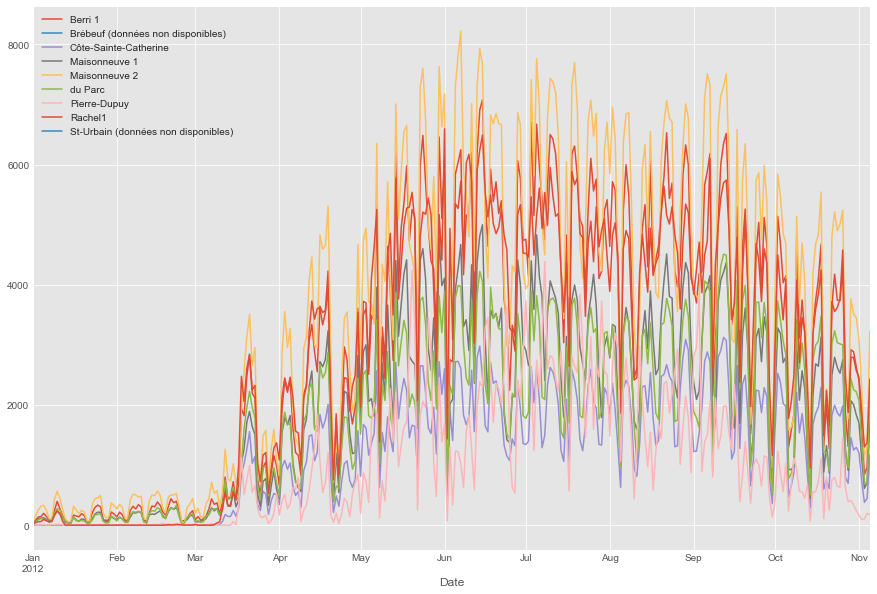

In [52]:
fixed_df.plot(figsize=(15, 10))

# Putting all that together

Here's the code we needed to write do draw that graph, all together:

<AxesSubplot:xlabel='Date'>

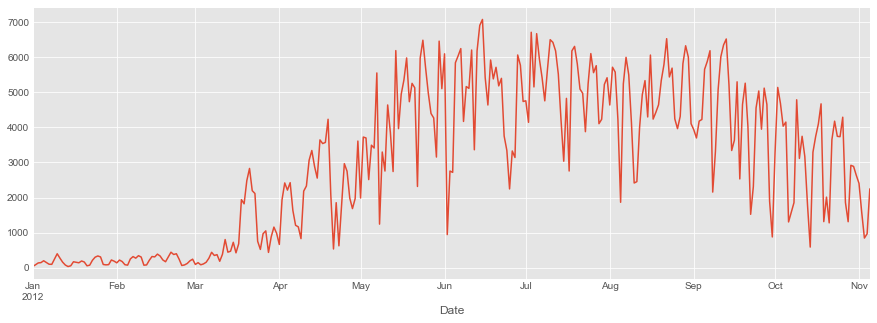

In [53]:
df = pd.read_csv('datasets/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
df['Berri 1'].plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  